In [8]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

with open('../data/polynominal_data.txt', 'r') as f:
    header = f.readline().strip().split()
    print(header)
    src = []
    for line in f:
        src.append(list(map(float, line.strip().split())))
src = np.array(src)
print(src)
x_ = src[:,0]
y = src[:,1]

['x', 'y']
[[ 4.5061228  -0.77687469]
 [ 5.96585272 -0.62836041]
 [ 2.03092858  1.07845836]
 [ 6.21971879  0.20526847]
 [ 0.38079911  0.1918422 ]
 [ 5.77545316 -0.00724068]
 [ 6.15625227 -0.16254552]
 [ 3.10985939  0.06681243]
 [ 6.28318531  0.42554726]
 [ 1.84052903  1.47103415]
 [ 4.82345539 -0.99603019]
 [ 5.14078798 -0.90308175]
 [ 3.61759154 -0.58720293]
 [ 3.4906585  -0.15296634]
 [ 1.01546429  0.70823002]]


# 多項式リッジ回帰
## 正則化パラメタによる影響の可視化

/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64471e-19): result may not be accurate.
  overwrite_a=True).T
/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.69132e-19): result may not be accurate.
  overwrite_a=True).T
/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.15973e-19): result may not be accurate.
  overwrite_a=True).T
/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.8442e-19): result may not be accurate.
  overwrite_a=True).T
/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:

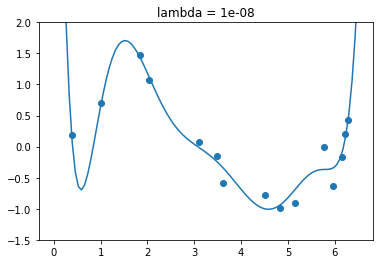

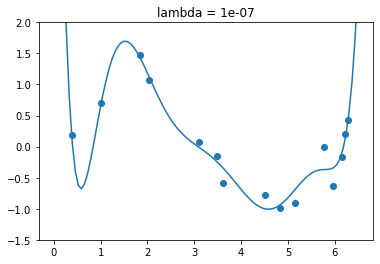

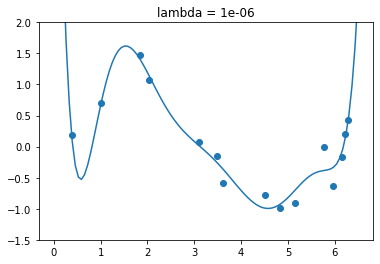

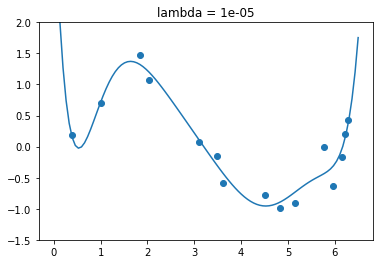

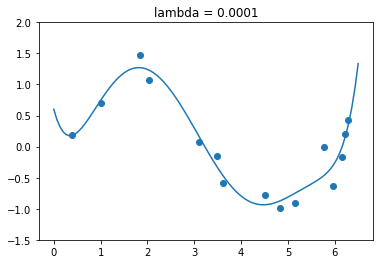

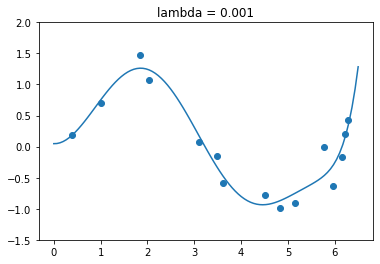

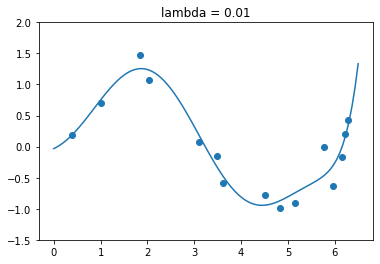

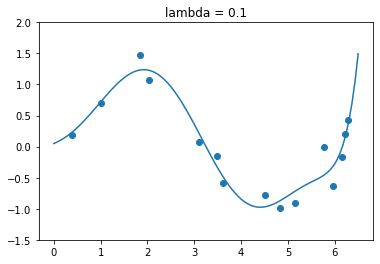

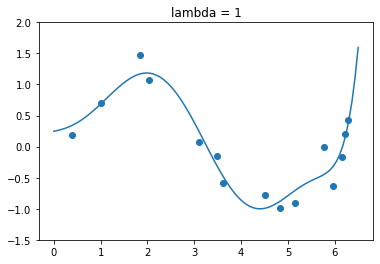

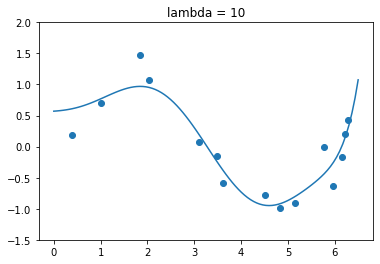

In [9]:
alphas = [10**(i-8) for i in range(10)]
for alpha in alphas:
    x = list(map(lambda x:[x**(i+1) for i in range(8)], x_))
    reg= linear_model.Ridge(alpha=alpha)  
    reg.fit(x, y)
    X_ = np.linspace(0,6.5,100)
    X = np.array(list(map(lambda x:[x**(i+1) for i in range(8)], X_)))
    pred = reg.intercept_ + X.dot(reg.coef_.reshape(-1,1))
    plt.figure()
    plt.scatter(x_, y)
    plt.title('lambda = {}'.format(alpha))
    plt.plot(X_, pred)
    plt.ylim(-1.5,2)
    plt.savefig('{}.png'.format(alpha))

## cross validation

alpha =  1e-08
61.04847400671266
alpha =  1e-07
22.147331231830456
alpha =  1e-06
3.9003739377821156
alpha =  1e-05
2.3102354073050098
alpha =  0.0001
0.846734861919012
alpha =  0.001
0.2587467217489846
alpha =  0.01
0.1813468100898014
alpha =  0.1
0.1596259622042855
alpha =  1
0.1565195534844097
alpha =  10
0.18624335245082477


/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27488e-19): result may not be accurate.
  overwrite_a=True).T
/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.18984e-21): result may not be accurate.
  overwrite_a=True).T
/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.1752e-19): result may not be accurate.
  overwrite_a=True).T
/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.56141e-19): result may not be accurate.
  overwrite_a=True).T
/Users/isokawakoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:

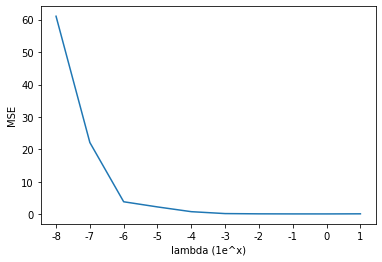

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

x = list(map(lambda x:[x**(i+1) for i in range(8)], x_))
kfold = KFold(n_splits=5)
errors = []
for alpha in alphas:
    reg= linear_model.Ridge(alpha=alpha)  
    scores = cross_val_score(reg, x, y, cv=kfold, scoring='neg_mean_squared_error')
    error = np.array(-scores).mean()
    errors.append(error)
    print('alpha = ', alpha)
    print(error)
xtick = np.array([(i-8) for i in range(10)])
plt.xticks(range(10), xtick)
plt.ylabel('MSE')
plt.xlabel('lambda (1e^x)')
plt.plot(errors)

In [12]:
with open('../data/diet_data.txt', 'r') as f:
    header = f.readline().strip().split()
    print(header)
    src = []
    for line in f:
        src.append(list(map(float, line.strip().split())))
src = np.array(src)
y = src[:,0]
x = src[:,1:]
print(x)

['carbohydrate', 'age', 'weight', 'protein']
[[ 33. 100.  14.]
 [ 47.  92.  15.]
 [ 49. 135.  18.]
 [ 35. 144.  12.]
 [ 46. 140.  15.]
 [ 52. 101.  14.]
 [ 62.  95.  14.]
 [ 23. 101.  17.]
 [ 32.  98.  15.]
 [ 42. 105.  14.]
 [ 31. 108.  17.]
 [ 61.  85.  19.]
 [ 63. 130.  19.]
 [ 40. 127.  20.]
 [ 50. 109.  15.]
 [ 64. 107.  16.]
 [ 56. 117.  18.]
 [ 61. 100.  13.]
 [ 48. 118.  18.]
 [ 28. 102.  14.]]


# 多変数リッジ回帰

α =  1e-08
w_0 is 	 38.480604618858145
w_1, w_2, w_3 is 	 [-0.10683589 -0.22922675  1.85648409]
29.61266648352497
α =  1e-07
w_0 is 	 38.48060464013152
w_1, w_2, w_3 is 	 [-0.10683589 -0.22922675  1.85648408]
29.612666483524983
α =  1e-06
w_0 is 	 38.480604852865305
w_1, w_2, w_3 is 	 [-0.10683589 -0.22922675  1.85648406]
29.612666483524965
α =  1e-05
w_0 is 	 38.48060698020288
w_1, w_2, w_3 is 	 [-0.10683588 -0.22922674  1.85648388]
29.61266648352514
α =  0.0001
w_0 is 	 38.4806282535549
w_1, w_2, w_3 is 	 [-0.10683582 -0.2292267   1.85648203]
29.612666483544132
α =  0.001
w_0 is 	 38.48084098470469
w_1, w_2, w_3 is 	 [-0.10683517 -0.22922624  1.85646353]
29.612666485442567
α =  0.01
w_0 is 	 38.48296805919156
w_1, w_2, w_3 is 	 [-0.10682873 -0.22922166  1.85627856]
29.612666675245613
α =  0.1
w_0 is 	 38.50421512905763
w_1, w_2, w_3 is 	 [-0.10676441 -0.22917586  1.85443089]
29.612685617566665
α =  1
w_0 is 	 38.71434415920605
w_1, w_2, w_3 is 	 [-0.10612797 -0.22872247  1.83615387]


Text(0.5, 0, 'lambda (1e^x)')

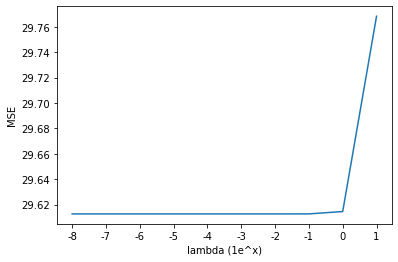

In [13]:
from sklearn.metrics import mean_squared_error
errors = []
for alpha in alphas:
    reg= linear_model.Ridge(alpha = alpha)  
    reg.fit(x, y)
    error = mean_squared_error(y, reg.predict(x))
    print("α = ", alpha)
    print("w_0 is \t", reg.intercept_)
    print("w_1, w_2, w_3 is \t", reg.coef_)
    print(mean_squared_error(y, reg.predict(x)))
    errors.append(error)
plt.plot(errors)
xtick = np.array([(i-8) for i in range(10)])
plt.xticks(range(10), xtick)
plt.ylabel('MSE')
plt.xlabel('lambda (1e^x)')

alpha =  1e-08
45.270240840168945
alpha =  1e-07
45.27024081158029
alpha =  1e-06
45.270240525693886
alpha =  1e-05
45.27023766683082
alpha =  0.0001
45.27020907830522
alpha =  0.001
45.26992320355419
alpha =  0.01
45.26706550628798
alpha =  0.1
45.23859330457662
alpha =  1
44.96410012848939
alpha =  10
43.037253877255715
alpha =  100
43.60320577663843
alpha =  1000
51.6459110753255
alpha =  10000
55.6727483103365
alpha =  100000
58.48431401017153
alpha =  1000000
58.94007217015703


Text(0.5, 0, 'lambda (1e^x)')

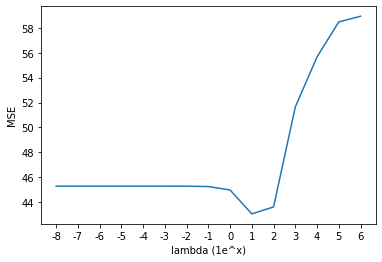

In [14]:
alphas = [10**(i-8) for i in range(15)]
errors = []
for alpha in alphas:
    reg= linear_model.Ridge(alpha=alpha)  
    scores = cross_val_score(reg, x, y, cv=kfold, scoring='neg_mean_squared_error')
    error = np.array(-scores).mean()
    errors.append(error)
    print('alpha = ', alpha)
    print(error)
plt.plot(errors)
xtick = np.array([(i-8) for i in range(15)])
plt.xticks(range(15), xtick)
plt.ylabel('MSE')
plt.xlabel('lambda (1e^x)')